<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

## Data Cleaning and EDA
____





In [151]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# Loading and Displaying Data
pd.set_option('display.max_rows', None)
ames = pd.read_csv('../data/train.csv')
ames.sort_values(by='Id', ascending=True).head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1080,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,215000
304,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,172000
574,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,189900
1673,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,191500
458,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,236500


In [153]:
# Checking Dataset size
ames.shape

(2051, 81)

In [154]:
# Renaming columns names
ames.columns = ames.columns.str.replace('Ms ', '', regex = False).str.replace(' ', '_')
ames.columns = ames.columns.str.lower()

In [155]:
ames.sort_values(by='saleprice', ascending=False).head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1671,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,New,611657
1964,1638,527216080,20,RL,52.0,51974,Pave,NaN,IR1,Lvl,...,322,0,NaN,NaN,NaN,0,6,2007,New,591587
1692,2451,528360050,60,RL,114.0,17242,Pave,NaN,IR1,Lvl,...,210,0,NaN,NaN,NaN,0,5,2006,WD,584500
1796,434,528110090,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,...,192,0,NaN,NaN,NaN,0,1,2009,New,582933
151,2333,527212030,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2006,New,556581


In [156]:
# Cheking for null values in dataset
ames.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

In [157]:
# Listing Coluns wiht NaN values bigger than 10% of dataset size
col_null = []
for i in ames.columns:
    if ames[i].isnull().sum() > ames.shape[0]*.1:
        col_null.append(i)
        print(f'{i}: {ames[i].isnull().sum()}')

# Dropping it because they are not relevent for the model
ames.drop(columns=col_null, inplace=True)

lot_frontage: 330
alley: 1911
fireplace_qu: 1000
pool_qc: 2042
fence: 1651
misc_feature: 1986


In [158]:
ames.isnull().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_area             0
street               0
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type        22
mas_vnr_area        22
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
heating              0
heating_qc           0
central_air          0
electrical           0
1st_flr_sf           0
2nd_flr_sf 

In [159]:
#Dropping null values since they are less then 10% of our dataset size
ames.dropna(inplace=True)
ames.shape

(1866, 75)

In [160]:
# Deleting unnecessary columns
ames.drop(columns='street', inplace=True)
ames.drop(columns='pid', inplace=True)
ames.drop(columns='sale_type', inplace=True)

# Deleting unnecessary columns
ames.drop(columns='pool_area', inplace=True)
ames.drop(columns='misc_val', inplace=True)

# Deleting column which were used to create another one
# 1st_flr_sf	2nd_flr_sf	low_qual_fin_sf	=> gr_liv_area
ames.drop(columns='1st_flr_sf', inplace=True)
ames.drop(columns='2nd_flr_sf', inplace=True)
ames.drop(columns='low_qual_fin_sf', inplace=True)

# bsmtfin_sf_1	bsmtfin_sf_2	bsmt_unf_sf	=> total_bsmt_sf
ames.drop(columns='bsmtfin_sf_1', inplace=True)
ames.drop(columns='bsmtfin_sf_2', inplace=True)
ames.drop(columns='bsmt_unf_sf', inplace=True)

# Creating a new feature total_square_feet 
ames['total_bldg_sqft'] =  ames['total_bsmt_sf'] + ames['gr_liv_area']
ames.drop(columns='total_bsmt_sf', inplace = True)
ames.drop(columns='gr_liv_area', inplace = True)

# Creating a feature bldg_age - bld_age  = yr_sold - year_built
ames['bldg_age'] = ames['yr_sold'] - ames['year_built']
ames.drop(columns='yr_sold', inplace=True)
ames.drop(columns='year_built', inplace=True)

# Creating a feature with total baths value
ames['total_baths'] = ames['bsmt_full_bath']+ (ames['bsmt_half_bath']* 0.5)+ ames['full_bath'] + (ames['half_bath'] * 0.5)
ames['total_baths'].isnull().sum()
ames.drop(columns='bsmt_full_bath', inplace=True)
ames.drop(columns='bsmt_half_bath', inplace=True)
ames.drop(columns='full_bath', inplace=True)
ames.drop(columns='half_bath', inplace=True)

# Creating a feature to total porch area
ames['total_porch'] = ames['open_porch_sf'] + ames['enclosed_porch'] + ames['3ssn_porch']+ ames['screen_porch']
ames.drop(columns='open_porch_sf', inplace=True)
ames.drop(columns='enclosed_porch', inplace=True)
ames.drop(columns='3ssn_porch', inplace=True)
ames.drop(columns='screen_porch', inplace=True)

# Mapping a value for central
ames['central_air'] = ames['central_air'].map({'Y': 1, 'N': 0})

# Dropping Colinear features / unnecessary columns 
ames.drop(columns = 'heating_qc', inplace = True)
ames.drop(columns = 'mo_sold', inplace = True)
ames.drop(columns = 'garage_yr_blt', inplace = True)
ames.drop(columns = 'garage_type', inplace = True)
ames.drop(columns = 'electrical', inplace = True)
ames.drop(columns = 'bsmt_qual', inplace = True)
ames.drop(columns = 'year_remod/add', inplace = True)
ames.shape

(1866, 49)

In [161]:
# Applying correct types for features columns 

# Setting up type (object) for the category features 
col_tp_object = ['id','ms_subclass', 'ms_zoning', 'lot_shape', 'land_contour', 
                'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 
                'condition_2', 'bldg_type', 'house_style','roof_style', 'roof_matl', 
                'exterior_1st', 'exterior_2nd', 'mas_vnr_type','exter_qual','exter_cond', 
                'foundation','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','heating', 'kitchen_qual',
                'functional', 'garage_finish','garage_qual','garage_cond','paved_drive'
]
for c in col_tp_object:
    ames[c] = ames[c].astype(str)

# Setting up type (int) for the discret features
col_tp_disc = [  'overall_cond','overall_qual','central_air', 
                'bedroom_abvgr', 'kitchen_abvgr','totrms_abvgrd', 
                'fireplaces', 'garage_cars', 'total_baths','bldg_age'
]
for c in col_tp_disc:
    ames[c] = ames[c].astype(int) 

# Setting up type (float) for the continuous features 
col_tp_continuos = ['lot_area','mas_vnr_area',
                    'garage_area', 'wood_deck_sf',
                    'total_bldg_sqft','total_porch', 'saleprice'
]            
for c in col_tp_continuos:
    ames[c] = ames[c].astype(float)

In [162]:
# Checking Correlations between numerics variables 
# to see how straong they are with the target (sale price)
# and target (we ar not considering the ID column)
num_features = ames.select_dtypes(include = 'number')
corr_features = num_features.corr()

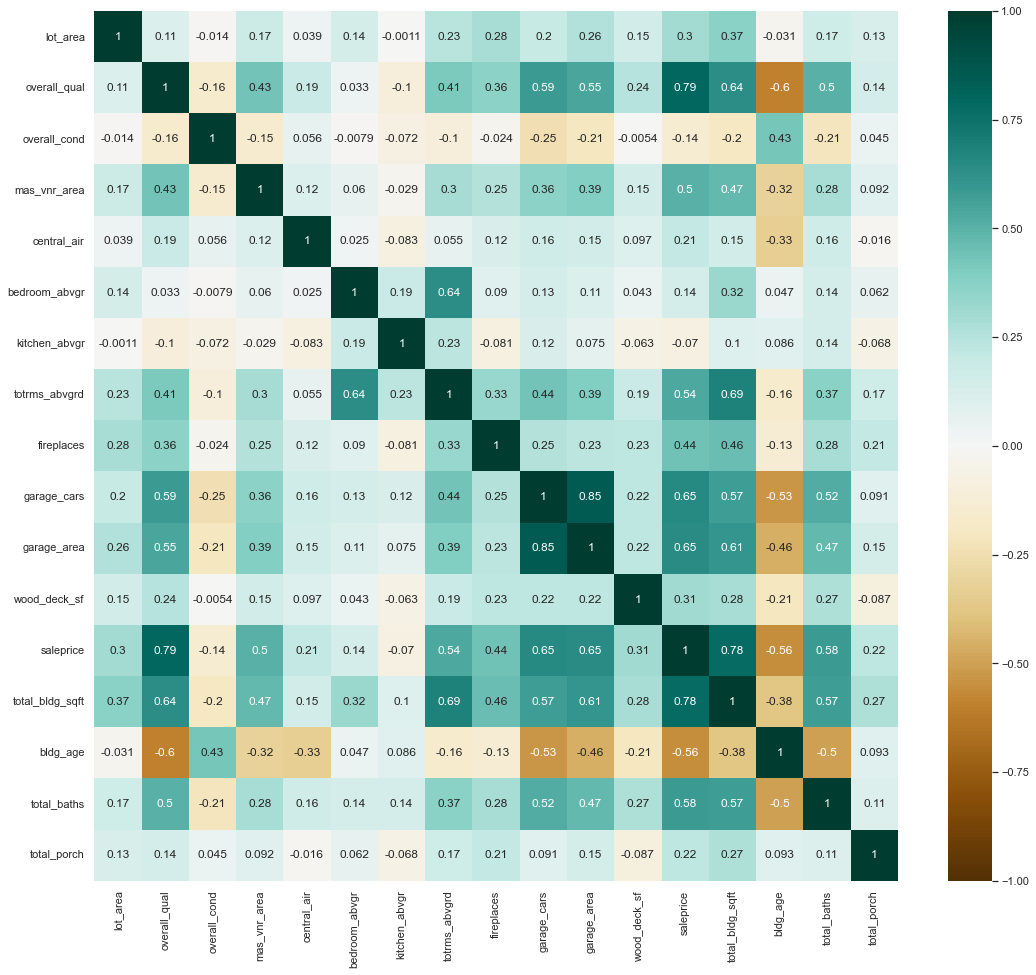

In [163]:
# Heatmap to visualize correlations
plt.figure(figsize = (18, 16))
sns.heatmap(corr_features, annot = True, vmin =-1, vmax = 1, cmap = 'BrBG');

In [164]:
# Getting just correlations between target and features
# and adding the strong ones in a list
correlations = corr_features.loc["saleprice"].sort_values()
strong_corr = []
for i in correlations.index:
    if (correlations[i] <= -0.50) or (correlations[i] >= 0.50):
        strong_corr.append(i)
print("Continuous Features with strong correlation with the sale price", strong_corr)

Continuous Features with strong correlation with the sale price ['bldg_age', 'mas_vnr_area', 'totrms_abvgrd', 'total_baths', 'garage_area', 'garage_cars', 'total_bldg_sqft', 'overall_qual', 'saleprice']


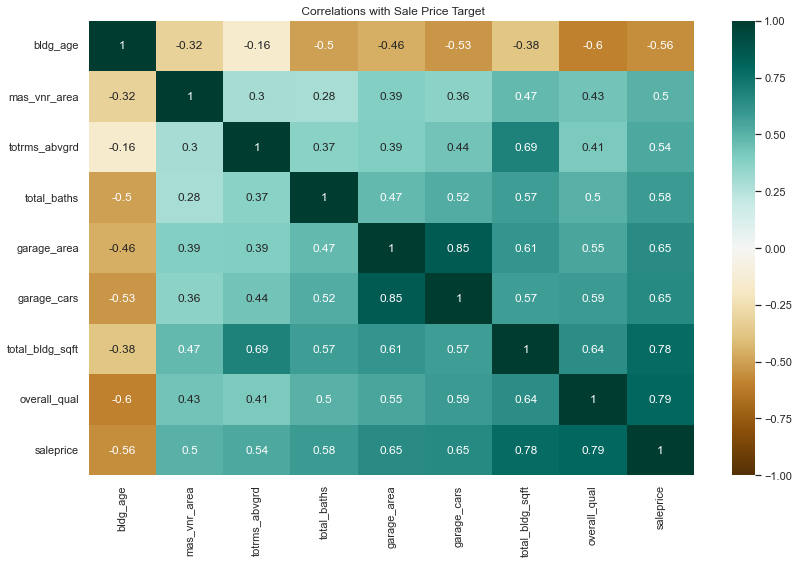

In [165]:
# Heatmap for strong correlation features with Sale Price 
# even negative ones
df_corr = ames[strong_corr]

plt.figure(figsize = (12, 8))
plt.title(' Correlations with Sale Price Target')
sns.heatmap(df_corr.corr(), annot = True, vmin =-1, vmax = 1, cmap = 'BrBG');

plt.tight_layout()
plt.savefig('../images/CorrelationsPrice.png');

## Handling Outliers
___

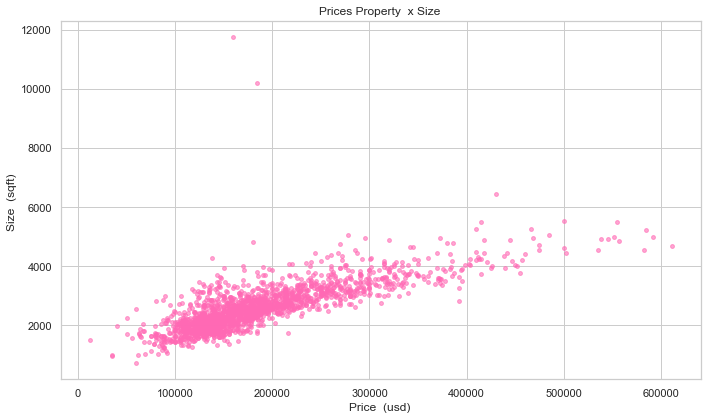

In [166]:
# Handling outliers 
plt.figure(figsize = (10, 6))
plt.title('Prices Property  x Size ')
plt.scatter(ames['saleprice'],
           ames['total_bldg_sqft'],
           color = 'hotpink', alpha = 0.6, label = 'properties', s=15)

plt.xlabel('Price  (usd) ')
plt.ylabel('Size  (sqft) ')
plt.tight_layout()
plt.savefig('../images/ScatterPlotPriceSize.png');


In [167]:
# Dropping it when sqft>4000 - see especial notes on dictionary
ames.drop(ames[ames['total_bldg_sqft']>4000].index, inplace=True)
ames.shape

(1777, 49)

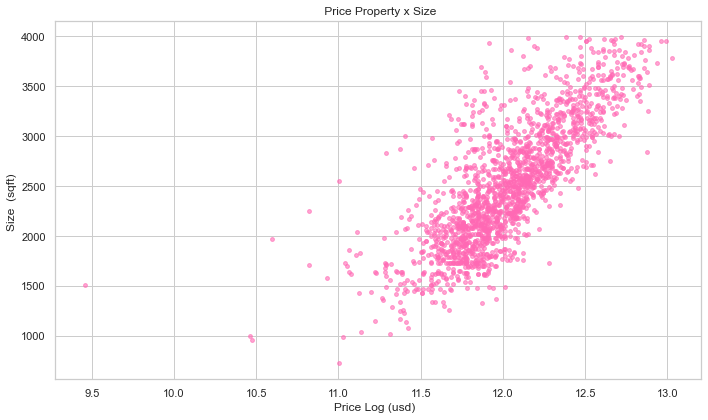

In [168]:
# Handling outliers 
plt.figure(figsize = (10, 6))
plt.title(' Price Property x Size')
plt.scatter(np.log(ames['saleprice']),
           ames['total_bldg_sqft'],
           color = 'hotpink', alpha = 0.6, label = 'properties', s=15)

plt.xlabel('Price Log (usd)  ')
plt.ylabel('Size  (sqft) ')
plt.tight_layout()
plt.savefig('../images/ScatterPlotPriceSizeWOutliersLog.png');


## Exploratory Visualizations
___

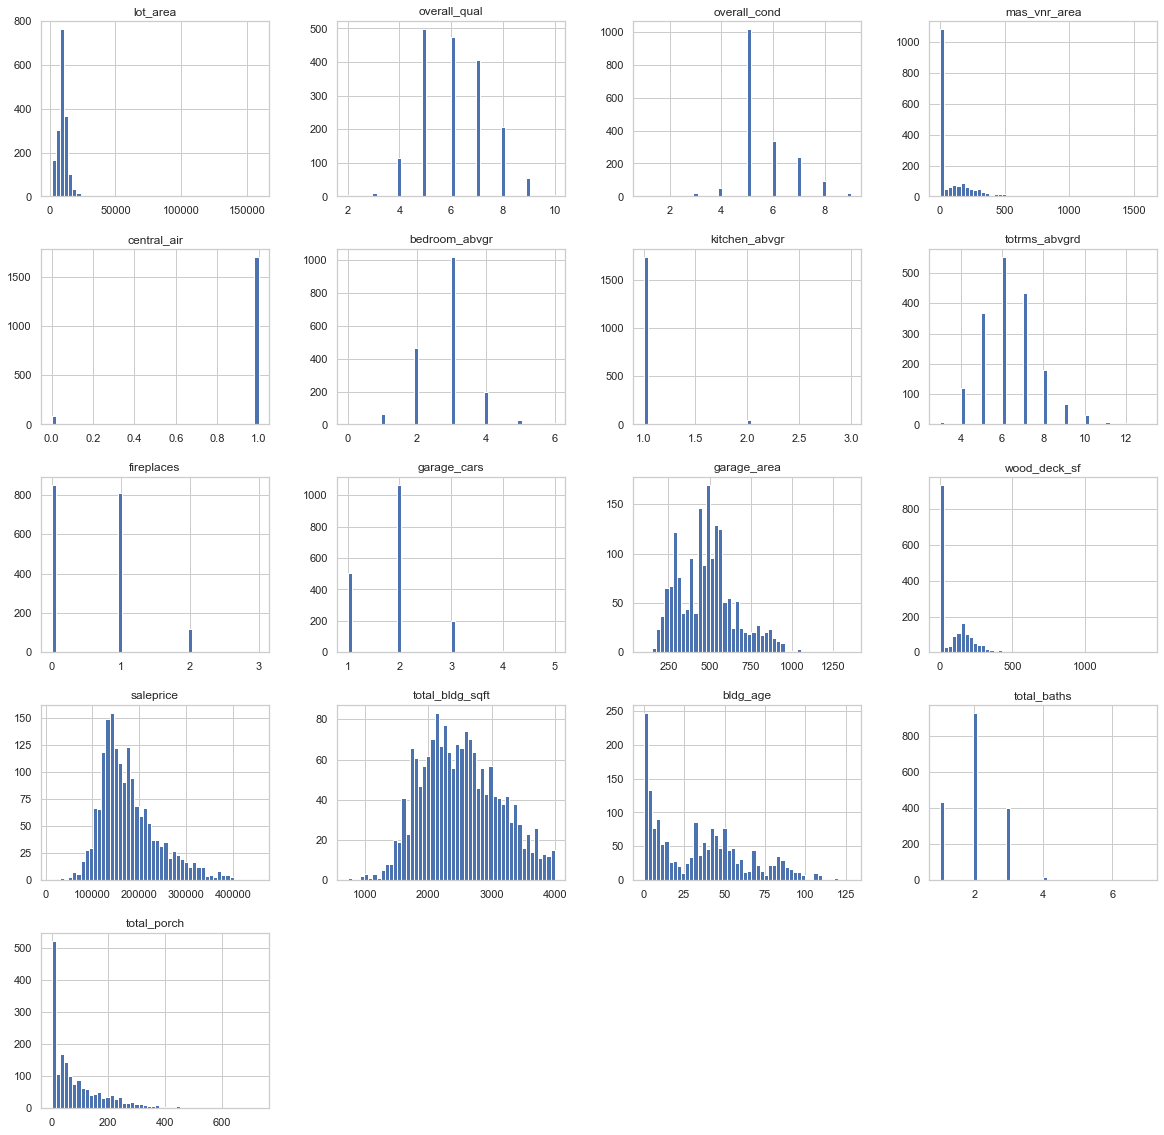

In [169]:
# Looking at Distributions 
ames.hist(figsize=(20,20), bins=50);

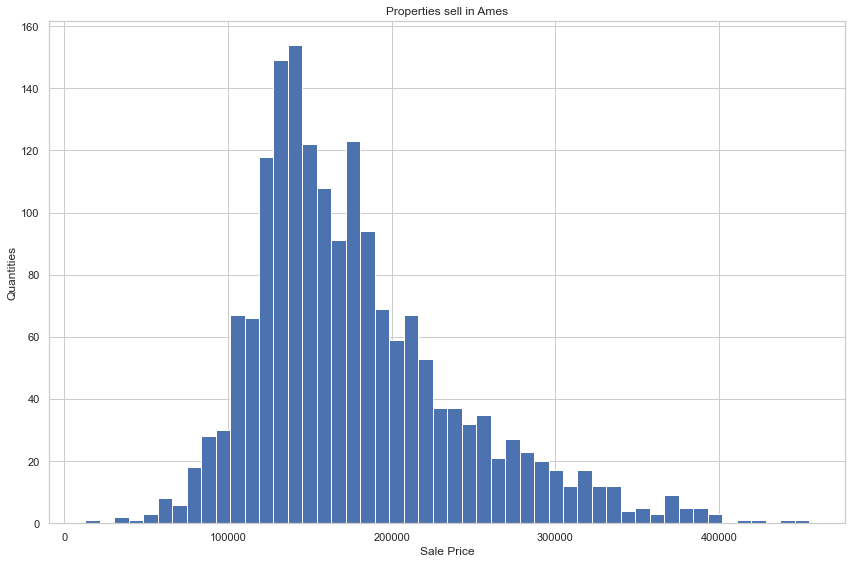

In [170]:
# HISTOGRAM
plt.figure(figsize = (12, 8))
plt.title('Properties sell in Ames')
plt.hist(ames['saleprice'], bins = 50)
plt.xlabel('Sale Price')
plt.ylabel('Quantities')
plt.tight_layout()
plt.savefig('../images/HistogramProperties.png');



In [171]:
# Looking at Correlations between discrit variables and tar
list_discrete = list(ames.select_dtypes(include = 'int'))
list_discrete.append("saleprice")
discrete_col = ames[list_discrete]

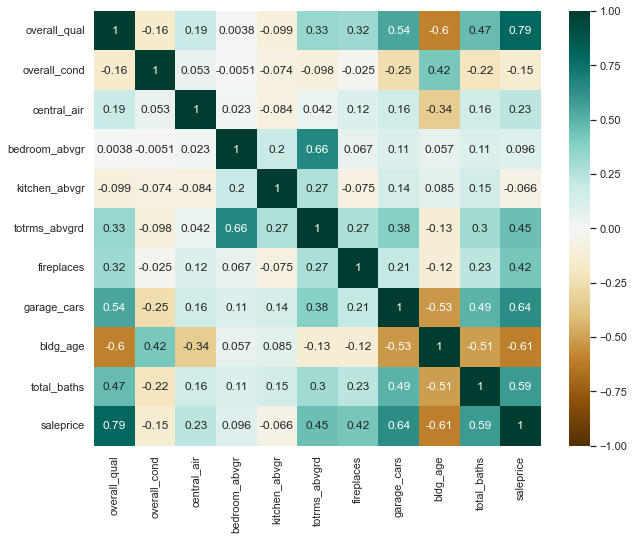

In [172]:
#Plotting Heatmap with Correlations
disc_corr = discrete_col.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(disc_corr, annot = True, vmin =-1, vmax = 1, cmap = 'BrBG');

In [173]:
correlations_disc = disc_corr.loc["saleprice"].sort_values()
strong_cor = []

for j in correlations_disc.index:
    if (correlations_disc[j] <= -0.50) or (correlations_disc[j]>= 0.50):
        strong_cor.append(j)
print("Continuous Features with strong correlation with the sale price", strong_cor)

Continuous Features with strong correlation with the sale price ['bldg_age', 'total_baths', 'garage_cars', 'overall_qual', 'saleprice']


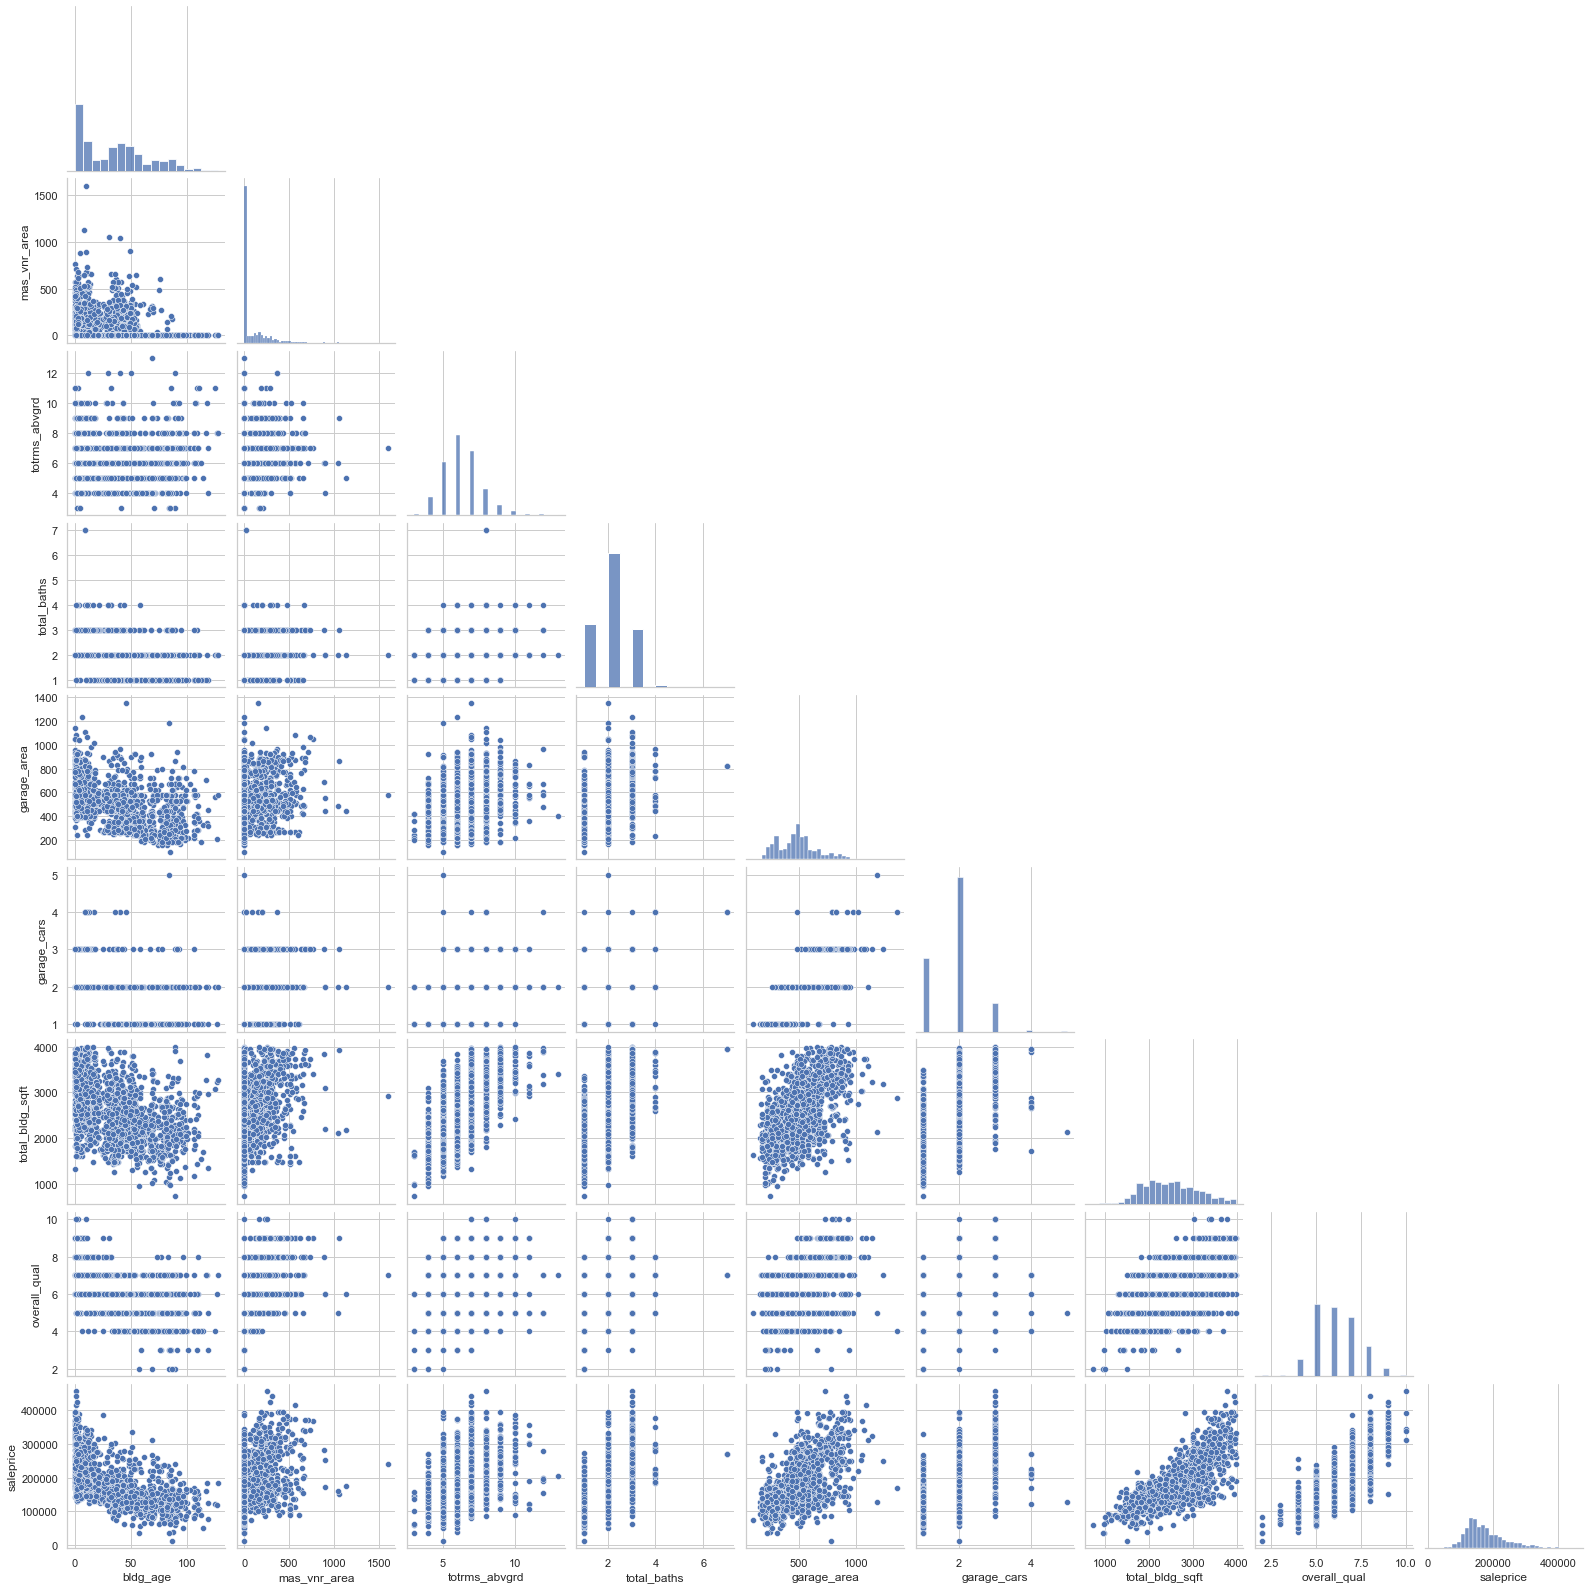

In [174]:
# Scatterplots for Continuous Features
sns.pairplot(ames[strong_corr],  corner=True);

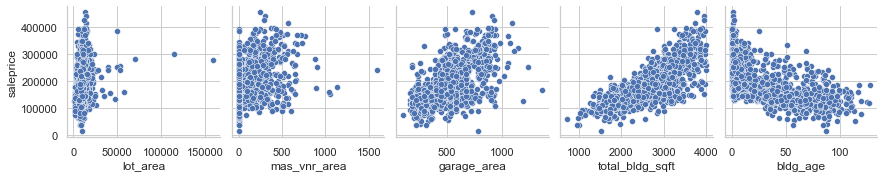

In [175]:
sns_plot = sns.pairplot(ames,
                y_vars = ['saleprice'],  
                x_vars = ['lot_area', 'mas_vnr_area','garage_area', 'total_bldg_sqft', 'bldg_age',  ])
fig = sns_plot.figure.savefig("../images/ScatterSeaFeatures.png");


In [176]:
# Barplots for Continuous Features and 
catg_object = ames.select_dtypes(include = 'object')

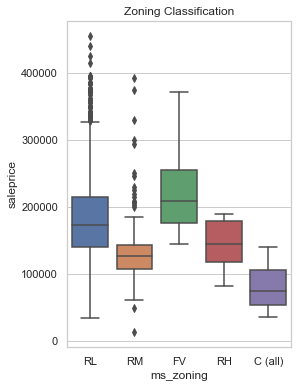

In [177]:
#Plotting Categorical Features and target
plt.figure(figsize = (4, 6))
plt.title('Zoning Classification')

sns.set(style='whitegrid')
sns.boxplot(x ='ms_zoning', y ='saleprice', data = ames);


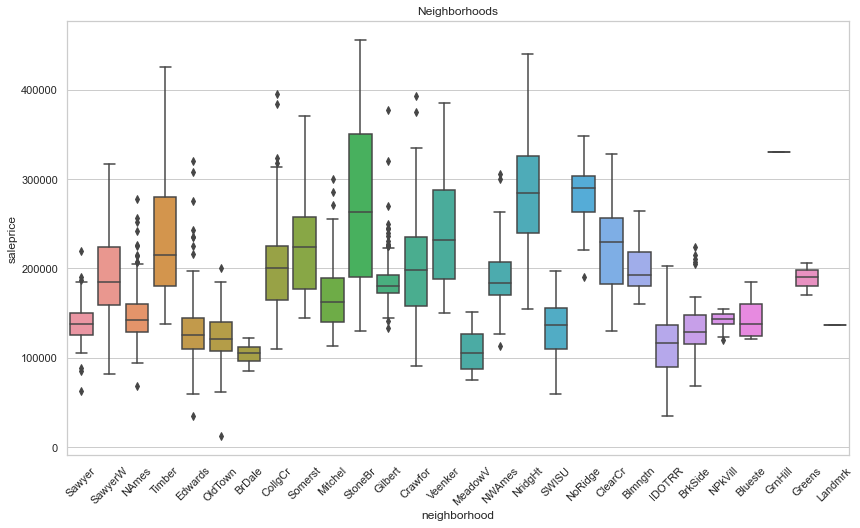

In [178]:
#Plotting Categorical Features and target
plt.figure(figsize = (14, 8))
plt.title('Neighborhoods')

sns.set(style='whitegrid')
ax = sns.boxplot(x ='neighborhood', y ='saleprice', data = ames, )
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
fig = ax.figure.savefig("../images/BoxPlotNeighborhoods.png");

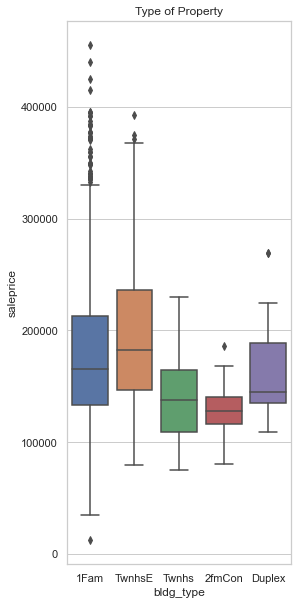

In [179]:
#Plotting Categorical Features and target
plt.figure(figsize = (4, 10))
plt.title('Type of Property')

sns.set(style='whitegrid')
sns.boxplot(x ='bldg_type', y ='saleprice', data = ames);

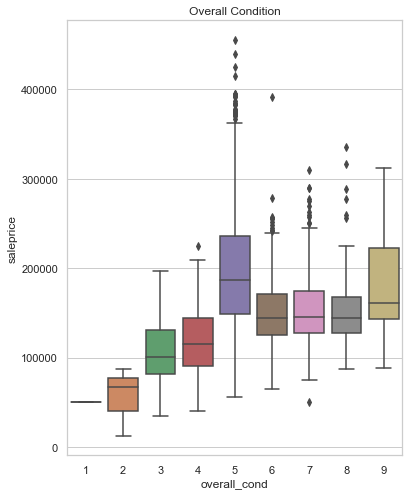

In [180]:
#Plotting Categorical Features and Target
plt.figure(figsize = (6, 8))
plt.title('Overall Condition')

sns.set(style='whitegrid')
sns.boxplot(x ='overall_cond', y ='saleprice', data = ames);

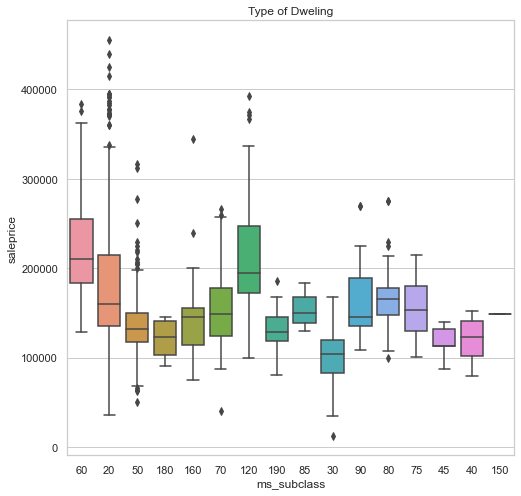

In [181]:
#Plotting Categorical Features and Target
plt.figure(figsize = (8, 8))
plt.title('Type of Dweling')

sns.set(style='whitegrid')
sns.boxplot(x ='ms_subclass', y ='saleprice', data = ames);

### Looking for outliers Through quartile
___

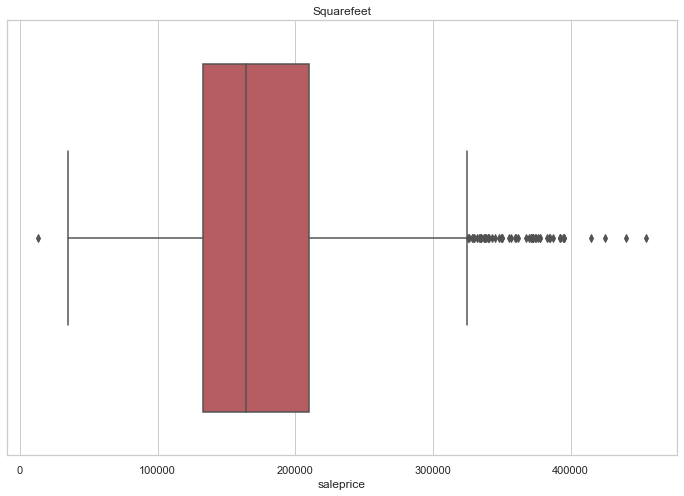

In [182]:
plt.figure(figsize = (12, 8))
plt.title('Squarefeet')
sns.boxplot(x = ames['saleprice'], color = 'r');

In [183]:
Q1 = ames['saleprice'].quantile(0.25)
Q3 = ames['saleprice'].quantile(0.75)
IQR = Q3 - Q1
ames.drop(ames[ames['saleprice'] < (Q1 - 1.5 * IQR)].index, inplace=True)   
ames.drop(ames[ames['saleprice'] > (Q3 + 1.5 * IQR)].index, inplace=True)
ames.shape


(1720, 49)

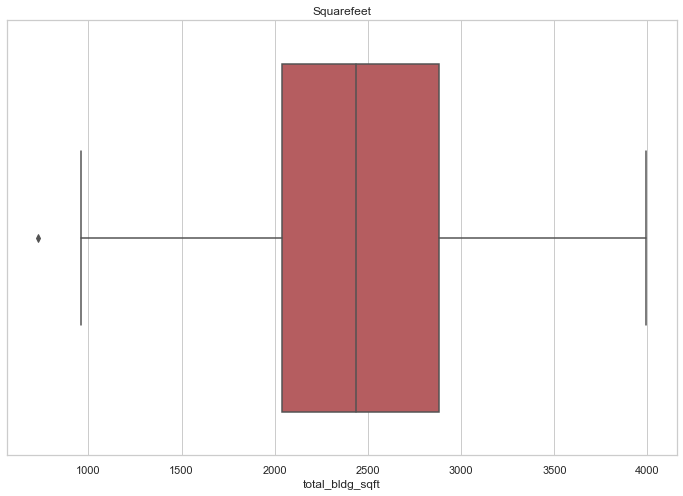

In [184]:
plt.figure(figsize = (12, 8))
plt.title('Squarefeet')
sns.boxplot(x = ames['total_bldg_sqft'], color = 'r');

In [185]:
Q1_ = ames['total_bldg_sqft'].quantile(0.25)
Q3_ = ames['total_bldg_sqft'].quantile(0.75)
IQR_ = Q3_ - Q1_
print(IQR_)
ames.drop(ames[ames['total_bldg_sqft'] < (Q1_ - 1.5 * IQR_)].index, inplace=True)   
ames.drop(ames[ames['total_bldg_sqft'] > (Q3_ + 1.5 * IQR_)].index, inplace=True)
ames.shape


847.25


(1719, 49)

In [186]:
ames.describe()

,lot_area,overall_qual,overall_cond,mas_vnr_area,central_air,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,wood_deck_sf,saleprice,total_bldg_sqft,bldg_age,total_baths,total_porch
count,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,9743.815009,6.054683,5.617801,84.506108,0.953461,2.815590,1.025596,6.278650,0.578825,1.807446,477.342641,90.774287,171675.281559,2475.868528,36.100640,1.981966,85.589296
std,6539.413685,1.206516,1.069172,147.026574,0.210710,0.761616,0.161616,1.365534,0.622188,0.610952,168.473236,122.789029,54515.289434,584.722922,29.057884,0.725569,98.895690
min,1300.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,100.000000,0.000000,35000.000000,960.000000,0.000000,1.000000,0.000000
25%,7417.500000,5.000000,5.000000,0.000000,1.000000,2.000000,1.000000,5.000000,0.000000,1.000000,349.500000,0.000000,132000.000000,2037.500000,8.000000,1.000000,0.000000
50%,9260.000000,6.000000,5.000000,0.000000,1.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.000000,0.000000,161000.000000,2436.000000,35.000000,2.000000,50.000000
75%,11098.000000,7.000000,6.000000,140.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,164.000000,203147.500000,2884.000000,53.500000,2.000000,131.500000
max,159000.000000,10.000000,9.000000,1600.000000,1.000000,6.000000,3.000000,13.000000,3.000000,5.000000,1356.000000,1424.000000,325000.000000,3994.000000,128.000000,7.000000,730.000000


In [187]:
df = ames.copy()
df.to_csv('../data/train_cleaned.csv')

### Data Dicitonary
___